In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [263]:
# Machine Learning imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score, f1_score, cohen_kappa_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

In [237]:
# Visualization setup
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [238]:
df = pd.read_csv("./data/linkedin.csv", sep=";")

In [239]:
print(f"✅ Data loaded successfully: {df.shape[0]:,} posts with {df.shape[1]} features")

✅ Data loaded successfully: 31,020 posts with 19 features


In [240]:
df.head()

,entity_id,post_type,followers,industry,location,post_id,format,post_date,post_day,post_hour,likes,comments,shares,num_sentences,company_mentions_count,profile_mentions_count,hashtags_count,external_links_count,processed
0,2,company,15157,Financial Services,United States,1,Image,2025-09-25T00:00:00+00:00,Thursday,15:00,19,1,2,7,0,0,0,0,True
1,2,company,15157,Financial Services,United States,2,Video,2025-09-23T00:00:00+00:00,Tuesday,15:00,38,1,3,5,1,1,0,1,True
2,2,company,15157,Financial Services,United States,3,Image,2025-09-18T00:00:00+00:00,Thursday,15:00,46,2,8,7,1,4,0,1,True
3,2,company,15157,Financial Services,United States,4,Document,2025-09-16T00:00:00+00:00,Tuesday,14:35,30,1,3,3,0,0,0,0,True
4,2,company,15157,Financial Services,United States,5,Image,2025-09-11T00:00:00+00:00,Thursday,15:00,32,1,3,3,1,2,0,0,True


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31020 entries, 0 to 31019
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   entity_id               31020 non-null  int64 
 1   post_type               31020 non-null  object
 2   followers               31020 non-null  int64 
 3   industry                31020 non-null  object
 4   location                31020 non-null  object
 5   post_id                 31020 non-null  int64 
 6   format                  31020 non-null  object
 7   post_date               31020 non-null  object
 8   post_day                31020 non-null  object
 9   post_hour               31020 non-null  object
 10  likes                   31020 non-null  int64 
 11  comments                31020 non-null  int64 
 12  shares                  31020 non-null  int64 
 13  num_sentences           31020 non-null  int64 
 14  company_mentions_count  31020 non-null  int64 
 15  pr

In [242]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
entity_id,31020.0,5.967056e+02,1.559828e+03,1.0,49.00,91.0,125.00,9955.0
followers,31020.0,1.153048e+06,4.066597e+06,0.0,8644.00,35323.0,330825.00,26494757.0
post_id,31020.0,1.810272e+04,1.038567e+04,1.0,8829.75,18645.5,27087.25,35322.0
likes,31020.0,1.352301e+02,1.021438e+03,0.0,10.00,28.0,84.00,128071.0
comments,31020.0,5.821728e+00,3.610454e+01,0.0,0.00,1.0,3.00,3649.0
shares,31020.0,9.051322e+00,8.465799e+01,0.0,0.00,2.0,6.00,11207.0
num_sentences,31020.0,5.519052e+00,3.754816e+00,0.0,3.00,5.0,7.00,48.0
company_mentions_count,31020.0,9.344939e-01,2.055085e+00,0.0,0.00,0.0,1.00,40.0
profile_mentions_count,31020.0,8.651515e-01,2.179987e+00,0.0,0.00,0.0,1.00,40.0
hashtags_count,31020.0,1.841779e+00,2.902643e+00,0.0,0.00,0.0,3.00,39.0


In [243]:
print("\n📊 DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['post_date'].min()} to {df['post_date'].max()}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate records: {df.duplicated().sum()}")


📊 DATASET OVERVIEW
------------------------------
Dataset shape: (31020, 19)
Date range: 2013-10-31T00:00:00+00:00 to 2025-10-01T00:00:00+00:00
Missing values: 0
Duplicate records: 0


# Preprocessing

In [244]:
print("\n🔧 DATA PREPROCESSING")
print("-" * 30)


🔧 DATA PREPROCESSING
------------------------------


In [245]:
data = df.copy()

In [246]:
data['post_date'] = pd.to_datetime(data['post_date'])

# Time zone conversion
location_offsets = {
    'United States': -5, 'United Kingdom': 0, 'Singapore': 8, 'France': 1,
    'Netherlands': 1, 'China': 8, 'Canada': -5, 'Poland': 1, 'India': 5.5,
    'Cayman Islands': -5, 'Switzerland': 1, 'Australia': 10,
    'United Arab Emirates': 4, 'Ireland': 0, 'Norway': 1, 'South Africa': 2,
    'Denmark': 1, 'Indonesia': 7
}
data['timezone_offset'] = data['location'].map(location_offsets).fillna(0)


In [248]:
data['post_hour_numeric'] = data['post_hour'].str.split(':').str[0].astype(int)
data['post_minute_numeric'] = data['post_hour'].str.split(':').str[1].astype(int)
data['post_minute_numeric'] = data['post_minute_numeric'].fillna(0)

In [249]:
# Decimal hour for detailed analysis
data['local_hour_decimal'] = (data['post_hour_numeric'] + data['timezone_offset'] + data['post_minute_numeric'] / 60) % 24
data['local_hour'] = (data['post_hour_numeric'] + data['timezone_offset']) % 24

In [ ]:
def get_time_segment(hour):
    if hour >= 6 and hour < 12:
        return 'morning'
    elif hour >= 12 and hour < 18:
        return 'afternoon'
    elif hour >= 18 and hour < 24:
        return 'evening'
    else:
        return 'night'
    
data['day_segment'] = data['local_hour_decimal'].apply(get_time_segment)

print(data['day_segment'].value_counts())

day_segment
afternoon    16422
morning       9175
evening       4119
night         1304
Name: count, dtype: int64


In [251]:
# Engagement targets
data['total_engagement'] = data['likes'] + data['comments'] + data['shares']
data['engagement_rate'] = (data['total_engagement'] / data['followers'] * 100).replace([np.inf, -np.inf], 0)
data['comments_ratio'] = data['comments'] / (data['likes'] + 1)

In [137]:
# Audience segmentation
data['audience_size_category'] = pd.cut(
    data['followers'], 
    bins=[0, 10000, 50000, 200000, float('inf')],
    labels=['Small', 'Medium', 'Large', 'Enterprise']
)

In [138]:
# Content features
data['has_hashtags'] = (data['hashtags_count'] > 0).astype(int)
data['has_external_links'] = (data['external_links_count'] > 0).astype(int)
data['has_mentions'] = ((data['company_mentions_count'] + data['profile_mentions_count']) > 0).astype(int)
data['total_mentions'] = data['company_mentions_count'] + data['profile_mentions_count']

In [139]:
# Content length categories
data['content_length_category'] = pd.cut(
    data['num_sentences'], 
    bins=[0, 3, 7, 15, float('inf')],
    labels=['Short', 'Medium', 'Long', 'Very_Long']
)

In [140]:
# Time-based features
data['is_weekend'] = data['post_day'].isin(['Saturday', 'Sunday']).astype(int)
data['is_business_hours'] = ((data['local_hour'] >= 9) & (data['local_hour'] <= 17)).astype(int)
data['hour_sin'] = np.sin(2 * np.pi * data['local_hour_decimal'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['local_hour_decimal'] / 24)

In [141]:
# Day of week encoding (cyclical)
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
               'Friday': 4, 'Saturday': 5, 'Sunday': 6}
data['day_numeric'] = data['post_day'].map(day_mapping)
data['day_sin'] = np.sin(2 * np.pi * data['day_numeric'] / 7)
data['day_cos'] = np.cos(2 * np.pi * data['day_numeric'] / 7)

In [142]:
# Advanced features
data['followers_log'] = np.log1p(data['followers'])
data['content_richness'] = (
    data['hashtags_count'] + data['external_links_count'] +
    data['total_mentions']
)
data['engagement_per_sentence'] = data['total_engagement'] / (data['num_sentences'] + 1)

In [143]:
# Remove outliers (engagement > 99th percentile)
engagement_99th = data['total_engagement'].quantile(0.99)
df_processed = data[data['total_engagement'] <= engagement_99th].copy()

In [144]:
print(f"✅ Preprocessing complete:")
print(f"   - Original data: {len(df)} posts")
print(f"   - After outlier removal: {len(df_processed)} posts")
print(f"   - Features created: {df_processed.shape[1] - df.shape[1]} new features")


✅ Preprocessing complete:
   - Original data: 31020 posts
   - After outlier removal: 30709 posts
   - Features created: 25 new features


# EDA

In [145]:
print("\n📈 EXPLORATORY DATA ANALYSIS")
print("-" * 35)


📈 EXPLORATORY DATA ANALYSIS
-----------------------------------


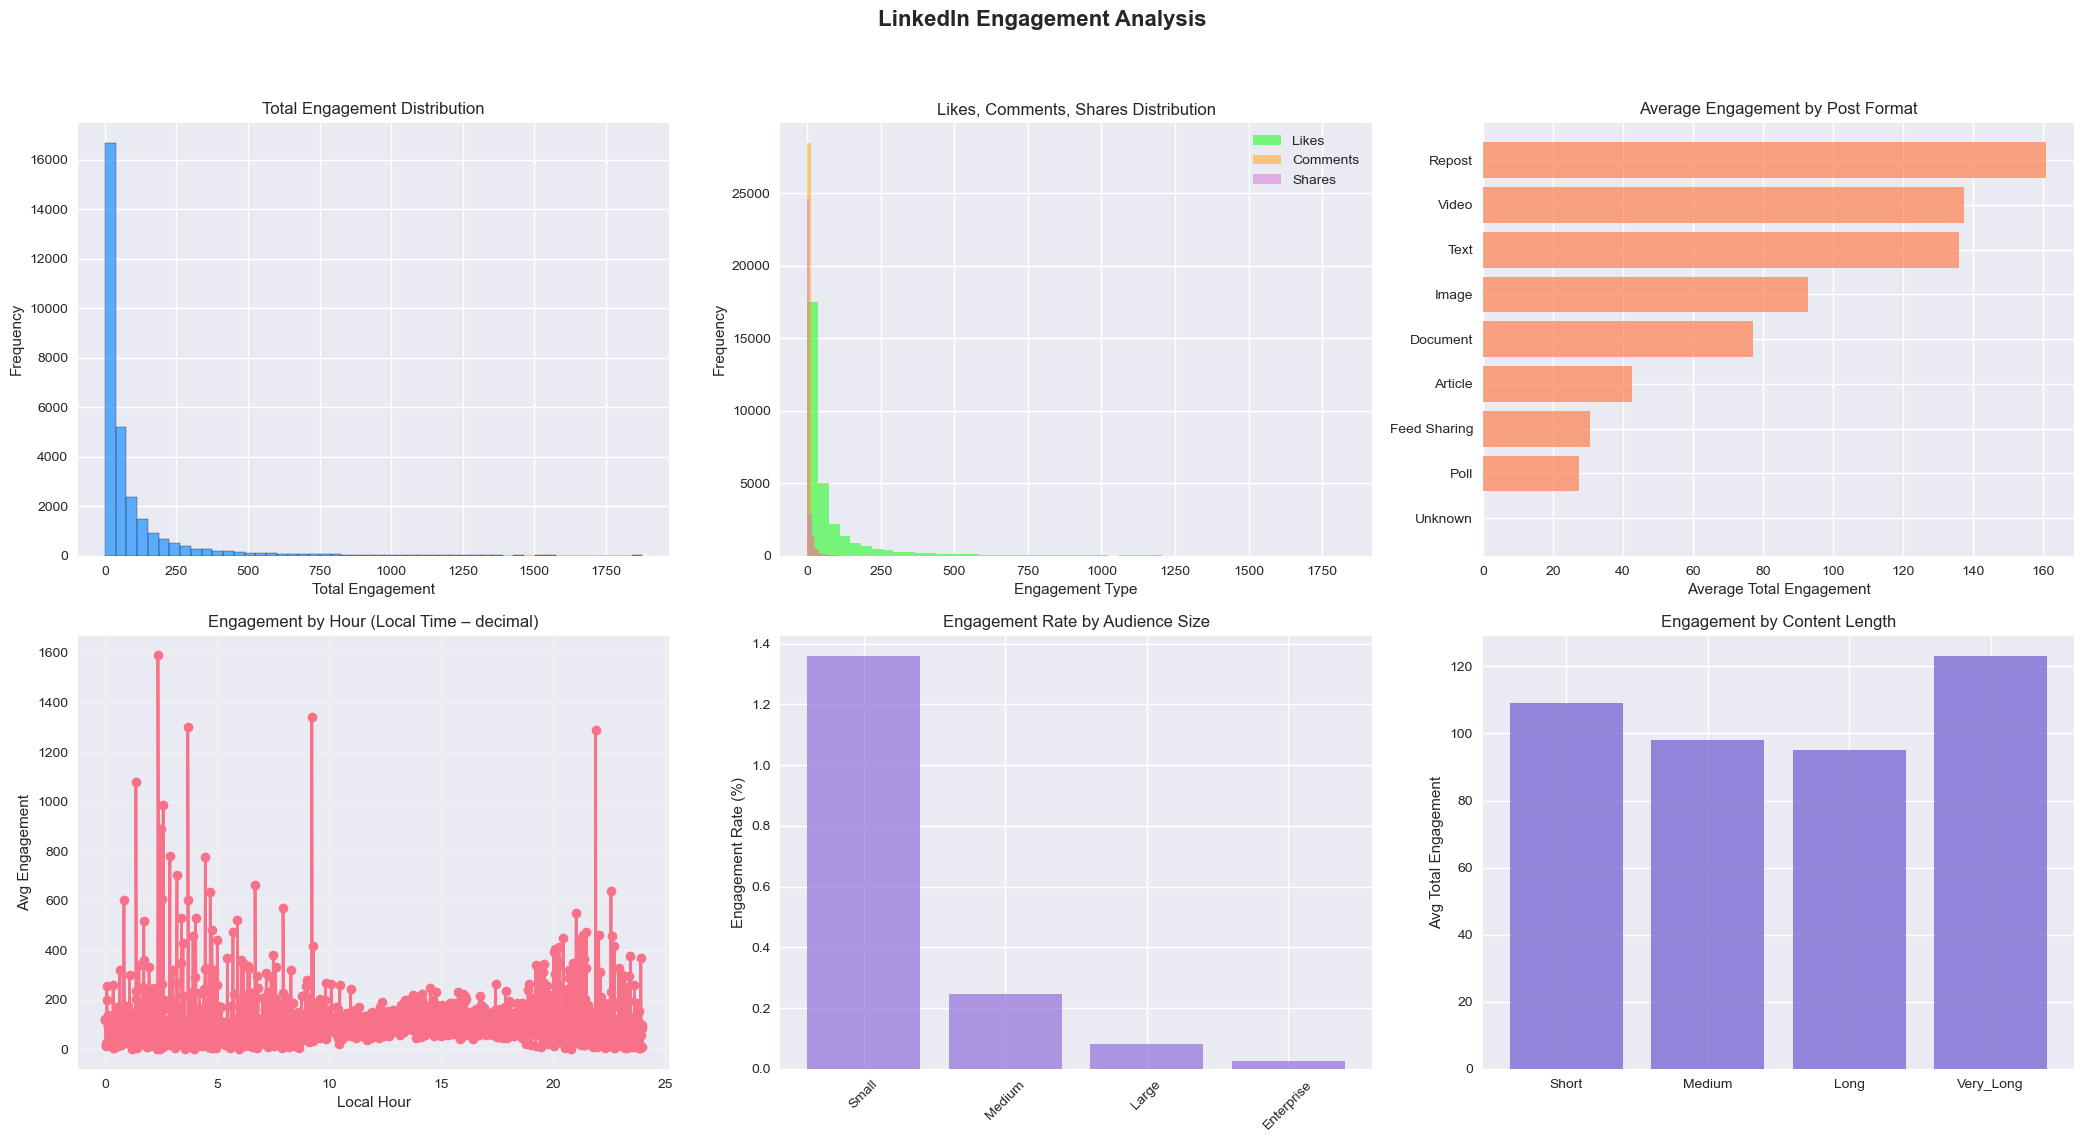

In [ ]:
# 1. Engagement metrics distribution
fig, axes = plt.subplots(2, 3, figsize=(21, 12))
fig.suptitle('LinkedIn Engagement Analysis', fontsize=16, fontweight='bold')

# Total engagement
axes[0, 0].hist(df_processed['total_engagement'], bins=50, alpha=0.7, edgecolor='black', color='dodgerblue')
axes[0, 0].set_title('Total Engagement Distribution')
axes[0, 0].set_xlabel('Total Engagement')
axes[0, 0].set_ylabel('Frequency')

# Likes/comments/shares
axes[0, 1].hist(df_processed['likes'], bins=50, alpha=0.5, label='Likes', color='lime')
axes[0, 1].hist(df_processed['comments'], bins=50, alpha=0.5, label='Comments', color='orange')
axes[0, 1].hist(df_processed['shares'], bins=50, alpha=0.5, label='Shares', color='orchid')
axes[0, 1].set_title('Likes, Comments, Shares Distribution')
axes[0, 1].set_xlabel('Engagement Type')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Format performance
format_engagement = df_processed.groupby('format')['total_engagement'].mean().sort_values(ascending=True)
axes[0, 2].barh(format_engagement.index, format_engagement.values, alpha=0.7, color='coral')
axes[0, 2].set_title('Average Engagement by Post Format')
axes[0, 2].set_xlabel('Average Total Engagement')

# Time analysis
hourly_engagement = df_processed.groupby('local_hour_decimal')['total_engagement'].mean()
axes[1, 0].plot(hourly_engagement.index, hourly_engagement.values, marker='o', linewidth=2)
axes[1, 0].set_title('Engagement by Hour (Local Time – decimal)')
axes[1, 0].set_xlabel('Local Hour')
axes[1, 0].set_ylabel('Avg Engagement')
axes[1, 0].grid(True, alpha=0.3)

# Audience size impact
audience_engagement = df_processed.groupby('audience_size_category')['engagement_rate'].mean()
axes[1, 1].bar(audience_engagement.index, audience_engagement.values, alpha=0.7, color='mediumpurple')
axes[1, 1].set_title('Engagement Rate by Audience Size')
axes[1, 1].set_ylabel('Engagement Rate (%)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Engagement by content length category
length_eng = df_processed.groupby('content_length_category')['total_engagement'].mean()
axes[1, 2].bar(length_eng.index.astype(str), length_eng.values, alpha=0.7, color='slateblue')
axes[1, 2].set_title('Engagement by Content Length')
axes[1, 2].set_ylabel('Avg Total Engagement')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

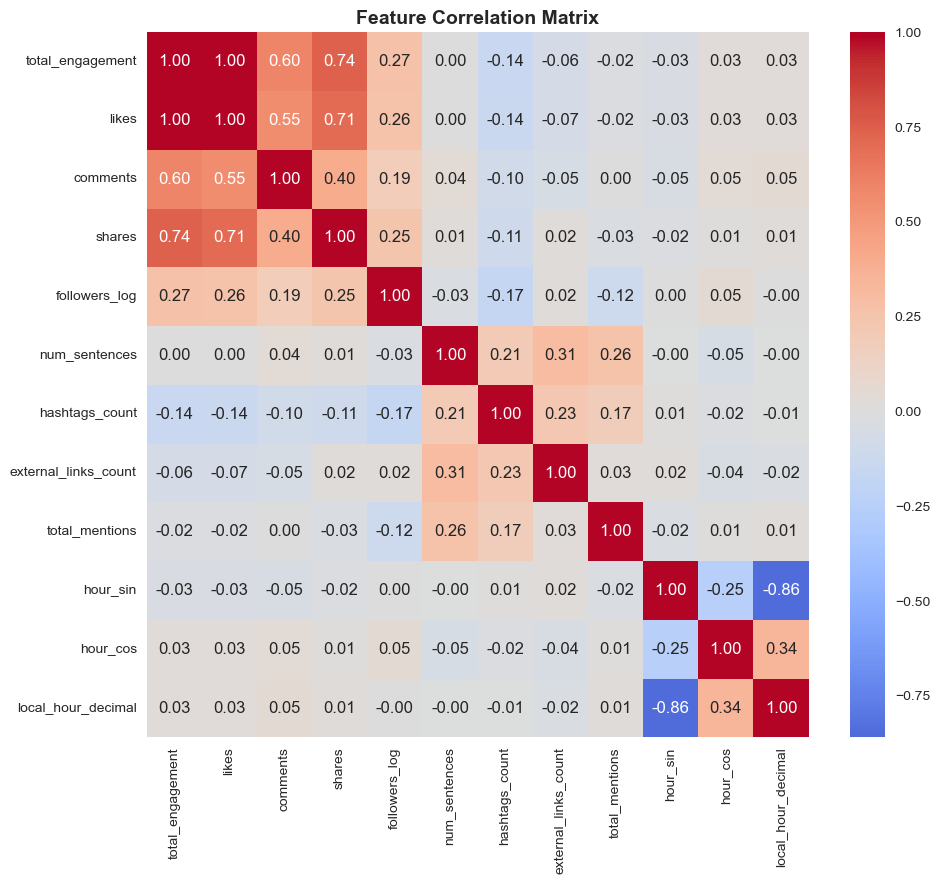

In [ ]:
# 2. Correlation analysis
plt.figure(figsize=(10,9))
numeric_cols = [
    'total_engagement', 'likes', 'comments', 'shares', 'followers_log',
    'num_sentences', 'hashtags_count', 'external_links_count', 'total_mentions',
    'hour_sin', 'hour_cos', 'local_hour_decimal'
]
correlation_matrix = df_processed[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

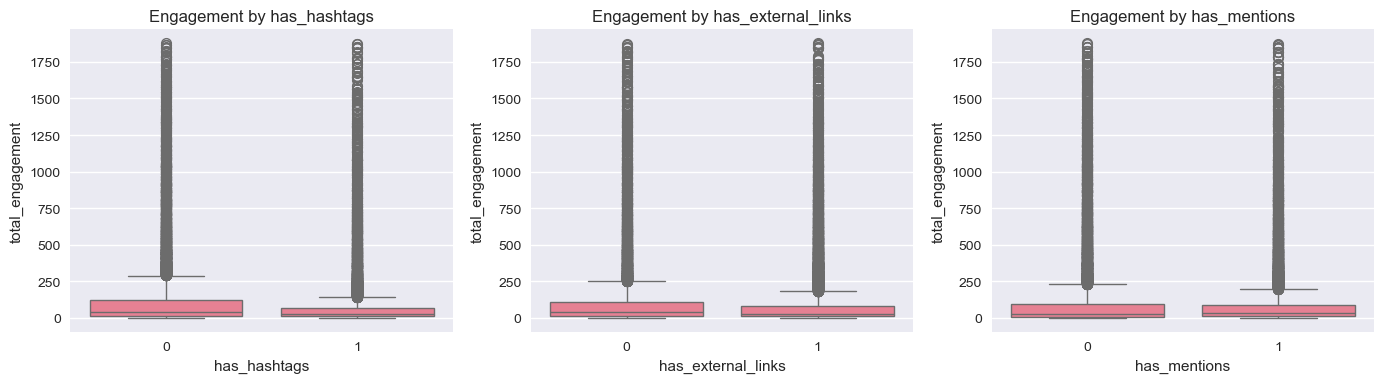

In [ ]:
# Engagement by hashtags, external links, mentions
plt.figure(figsize=(14,4))
for i, col in enumerate(['has_hashtags', 'has_external_links', 'has_mentions']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_processed[col], y=df_processed['total_engagement'])
    plt.title(f"Engagement by {col}")

plt.tight_layout()
plt.show()

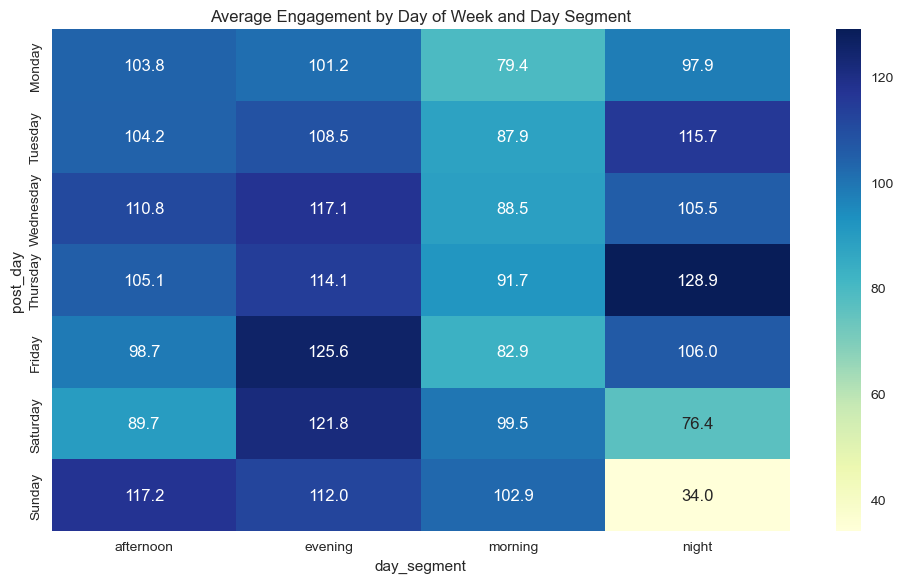

In [161]:
pivot = df_processed.pivot_table(
    index='post_day', columns='day_segment', values='total_engagement', aggfunc='mean'
).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Average Engagement by Day of Week and Day Segment')
plt.tight_layout()
plt.show()


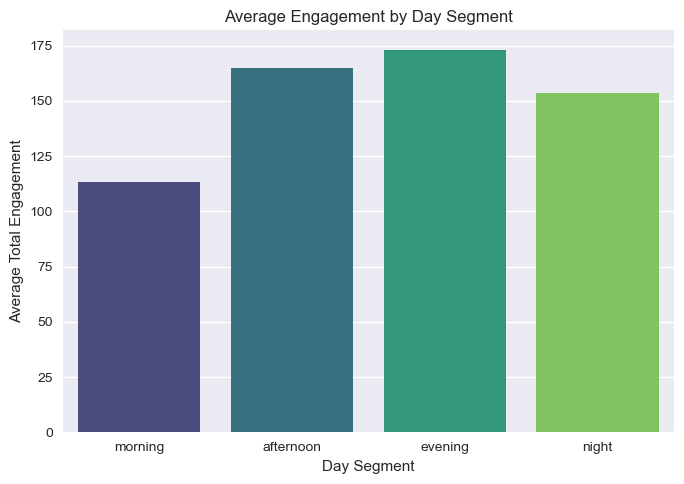

In [ ]:
segment_order = ['morning', 'afternoon', 'evening', 'night']

plt.figure(figsize=(7,5))
sns.barplot(x='day_segment', y='total_engagement', data=data, order=segment_order, ci=None, palette='viridis')
plt.title('Average Engagement by Day Segment')
plt.xlabel('Day Segment')
plt.ylabel('Average Total Engagement')
plt.tight_layout()
plt.show()


<Axes: xlabel='day_segment', ylabel='total_engagement'>

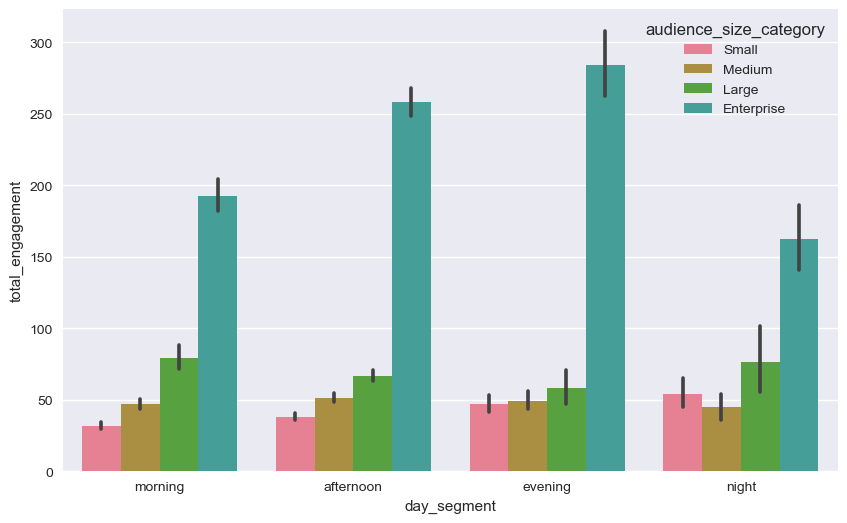

In [163]:
sns.barplot(x='day_segment', y='total_engagement', hue='audience_size_category', data=df_processed, order=segment_order)


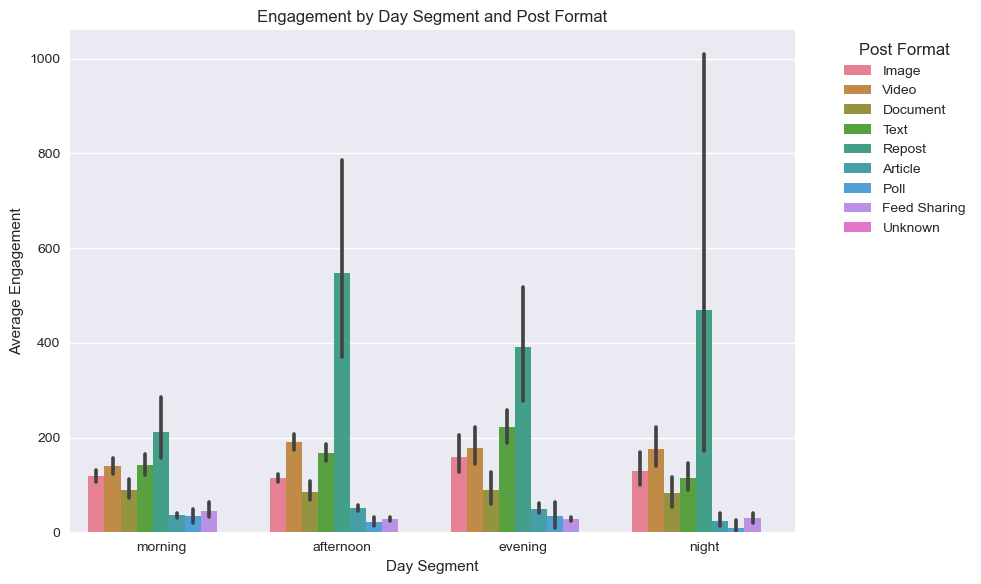

In [164]:
plt.figure(figsize=(10,6))
sns.barplot(x='day_segment', y='total_engagement', hue='format', data=data, order=segment_order)
plt.title('Engagement by Day Segment and Post Format')
plt.xlabel('Day Segment')
plt.ylabel('Average Engagement')
plt.legend(title='Post Format', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ML Preparation

In [167]:
print("\n🤖 MACHINE LEARNING PREPARATION")
print("-" * 35)


🤖 MACHINE LEARNING PREPARATION
-----------------------------------


In [168]:
# Feature selection
categorical_features = [
    'format', 'post_day', 'industry', 'location',
    'audience_size_category', 'content_length_category', 'day_segment'
]

numerical_features = [
    'local_hour', 'followers_log', 'num_sentences', 'hashtags_count',
    'external_links_count', 'total_mentions', 'content_richness',
    'is_weekend', 'is_business_hours', 'hour_sin', 'hour_cos',
    'day_sin', 'day_cos', 'has_hashtags', 'has_external_links', 'has_mentions'
]

features_used = categorical_features + numerical_features

In [259]:

is_nan = df_processed[features_used].isnull().sum()
if is_nan.any():
    print("\n⚠️ ATTENTION! Following columns contain NaN values:")
    print(is_nan[is_nan > 0])


⚠️ ATTENTION! Following columns contain NaN values:
audience_size_category     1722
content_length_category      89
dtype: int64


In [264]:
# Drop all rows with NaNs v target/model features
df_ml = df_processed.dropna(subset=features_used + ['total_engagement']).copy()
print(f"\nℹ️ Number of rows after deleting NaN: {len(df_ml)}/{len(df_processed)}")


ℹ️ Number of rows after deleting NaN: 28914/30709


In [ ]:
# Target variable
y = df_ml['total_engagement'].copy()
# Training features
X = df_ml[features_used].copy()

In [175]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=df_ml['audience_size_category'])


In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
])

In [ ]:
# Fit-transform on training, test only transform
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# Feature names for interpretability
cat_ohe = preprocessor.named_transformers_['cat']
cat_ohe_feature_names = cat_ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(cat_ohe_feature_names)


In [179]:
print(f"✅ Feature preparation complete:")
print(f"   - Numerical features: {len(numerical_features)} (scaled)")
print(f"   - Categorical features: {len(categorical_features)} (one-hot encoded)")
print(f"   - Total transformed features: {len(feature_names)}")
print(f"   - Target variable: total_engagement")

print(f"\n📊 Data split:")
print(f"   - Training set: {X_train_prep.shape[0]} samples | {X_train_prep.shape[1]} features")
print(f"   - Test set: {X_test_prep.shape[0]} samples | {X_test_prep.shape[1]} features")

✅ Feature preparation complete:
   - Numerical features: 16 (scaled)
   - Categorical features: 7 (one-hot encoded)
   - Total transformed features: 89
   - Target variable: total_engagement

📊 Data split:
   - Training set: 23131 samples | 89 features
   - Test set: 5783 samples | 89 features


# Model training

In [182]:
print("\n🎯 MODEL TRAINING AND EVALUATION")
print("-" * 40)


🎯 MODEL TRAINING AND EVALUATION
----------------------------------------


In [183]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=6, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, max_depth=6, random_state=42),
    'MLP Neural Net': MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=300, random_state=42)
}

In [ ]:
# Binary threshold for "high engagement"
threshold = np.median(y_train)
print(f"Engagement threshold for binarization: {threshold:.2f}")

Engagement threshold for binarization: 33.00


In [ ]:
results = {}
trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_prep, y_train)
    trained_models[name] = model

    # Prediction and basic regression metrics
    y_pred_train = model.predict(X_train_prep)
    y_pred_test = model.predict(X_test_prep)

    results[name] = {
        'Train R²': r2_score(y_train, y_pred_train),
        'Test R²': r2_score(y_test, y_pred_test),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Test MAE': mean_absolute_error(y_test, y_pred_test),
    }

    # Classification/binarization according to threshold
    y_true_bin = (y_test > threshold).astype(int)
    y_pred_bin = (y_pred_test > threshold).astype(int)

    # Classification metrics
    try:
        results[name]['Test ROC AUC'] = roc_auc_score(y_true_bin, y_pred_test)
    except Exception as e:
        print(f"ROC AUC error for {name}: {e}")
        results[name]['Test ROC AUC'] = np.nan

    results[name]['Test F1'] = f1_score(y_true_bin, y_pred_bin)
    results[name]['Test Kappa'] = cohen_kappa_score(y_true_bin, y_pred_bin)
    results[name]['Confusion Matrix'] = confusion_matrix(y_true_bin, y_pred_bin)
    
    # Cross-validation for regression results
    try:
        cv_scores = cross_val_score(model, X_train_prep, y_train, cv=3, scoring='r2')
        results[name]['CV R² Mean'] = cv_scores.mean()
        results[name]['CV R² Std'] = cv_scores.std()
    except Exception as e:
        results[name]['CV R² Mean'] = np.nan
        results[name]['CV R² Std'] = np.nan

# Results to a DataFrame
performance_df = pd.DataFrame(results).T.round(4)


Training Linear Regression...

Training Ridge Regression...

Training Lasso Regression...

Training Decision Tree...

Training Random Forest...

Training Gradient Boosting...

Training XGBoost...

Training MLP Neural Net...


In [186]:
# Display regression + classification results
cols_to_display = [
    'Test R²', 'Test RMSE', 'Test MAE',
    'Test ROC AUC', 'Test F1', 'Test Kappa', 'CV R² Mean'
]
print("\n📊 MODEL PERFORMANCE COMPARISON (Regression + Binary Classification):")
print(performance_df[cols_to_display].sort_values('Test R²', ascending=False))


📊 MODEL PERFORMANCE COMPARISON (Regression + Binary Classification):
                    Test R²   Test RMSE   Test MAE Test ROC AUC   Test F1  \
Gradient Boosting   0.47594  149.977527  69.198876     0.866812  0.776034   
XGBoost            0.467574  151.169793  69.652141     0.863389  0.781531   
Random Forest      0.454673  152.990315  71.876508     0.856696  0.774135   
MLP Neural Net     0.375153  163.765563  81.854639     0.796491  0.731317   
Decision Tree      0.339801  168.334466  74.855297     0.844229  0.753173   
Linear Regression  0.298303  173.544383  89.914422      0.79816  0.727038   
Ridge Regression   0.298292  173.545634   89.86106     0.797544  0.726571   
Lasso Regression   0.295922  173.838532  89.594582     0.792356  0.724187   

                  Test Kappa CV R² Mean  
Gradient Boosting   0.489872    0.46057  
XGBoost             0.514749   0.447115  
Random Forest       0.488367   0.447999  
MLP Neural Net      0.421376   0.379815  
Decision Tree       0.4320

In [ ]:
# Confusion matrix for a top model
best_model_name = performance_df['Test R²'].idxmax()
cm = results[best_model_name]['Confusion Matrix']
print(f"\nConfusion Matrix for {best_model_name}:\n{cm}")


Confusion Matrix for Gradient Boosting:
[[1728 1220]
 [ 264 2571]]


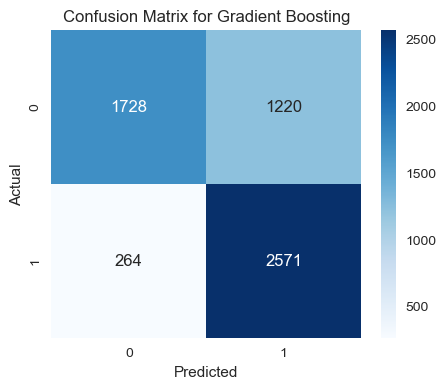

In [ ]:
# Confusion matrix plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optimalization

In [189]:
print("\n⚡️ Quick Gradient Boosting Optimization")


⚡️ Quick Gradient Boosting Optimization


In [ ]:
gb = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.05, 0.07, 0.1, 0.15],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(
    gb, param_grid, cv=2, scoring='r2', n_jobs=-1, verbose=1
)

In [200]:
grid_search.fit(X_train_prep, y_train)

Fitting 2 folds for each of 512 candidates, totalling 1024 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.07, 0.1, 0.15],
                         'max_depth': [3, 5, 7, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150, 200, 250],
                         'subsample': [0.8, 1.0]},
             scoring='r2', verbose=1)

In [201]:
best_model = grid_search.best_estimator_
y_pred_opt = best_model.predict(X_test_prep)

In [ ]:
# Regression metrics
opt_r2 = r2_score(y_test, y_pred_opt)
opt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_opt))
opt_mae = mean_absolute_error(y_test, y_pred_opt)

In [203]:
print(f"\n✅ Optimization complete (Gradient Boosting):")
print(f"   Best parameters: {grid_search.best_params_}")
print(f"   Optimized R²: {opt_r2:.4f}")
print(f"   Optimized RMSE: {opt_rmse:.2f}")
print(f"   Optimized MAE: {opt_mae:.2f}")


✅ Optimization complete (Gradient Boosting):
   Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
   Optimized R²: 0.4833
   Optimized RMSE: 148.92
   Optimized MAE: 69.48


In [ ]:
# Classification metrics for "high engagement"
threshold = np.median(y_train)
y_true_bin = (y_test > threshold).astype(int)
y_pred_bin = (y_pred_opt > threshold).astype(int)

In [205]:
try:
    opt_roc_auc = roc_auc_score(y_true_bin, y_pred_opt)
except Exception as e:
    opt_roc_auc = np.nan

opt_f1 = f1_score(y_true_bin, y_pred_bin)
opt_kappa = cohen_kappa_score(y_true_bin, y_pred_bin)
opt_conf_matrix = confusion_matrix(y_true_bin, y_pred_bin)

In [206]:
print(f"\n🔎 Binary classification metrics (optimized GB):")
print(f"   ROC AUC: {opt_roc_auc:.4f}")
print(f"   F1: {opt_f1:.4f}")
print(f"   Kappa: {opt_kappa:.4f}")

print(f"\nConfusion Matrix for Optimized GB:\n{opt_conf_matrix}")


🔎 Binary classification metrics (optimized GB):
   ROC AUC: 0.8593
   F1: 0.7642
   Kappa: 0.4535

Confusion Matrix for Optimized GB:
[[1614 1334]
 [ 257 2578]]


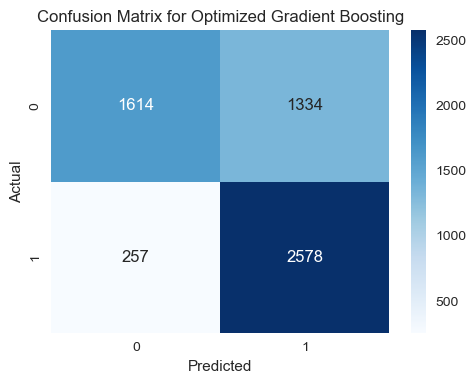

In [207]:
plt.figure(figsize=(5,4))
sns.heatmap(opt_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Optimized Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

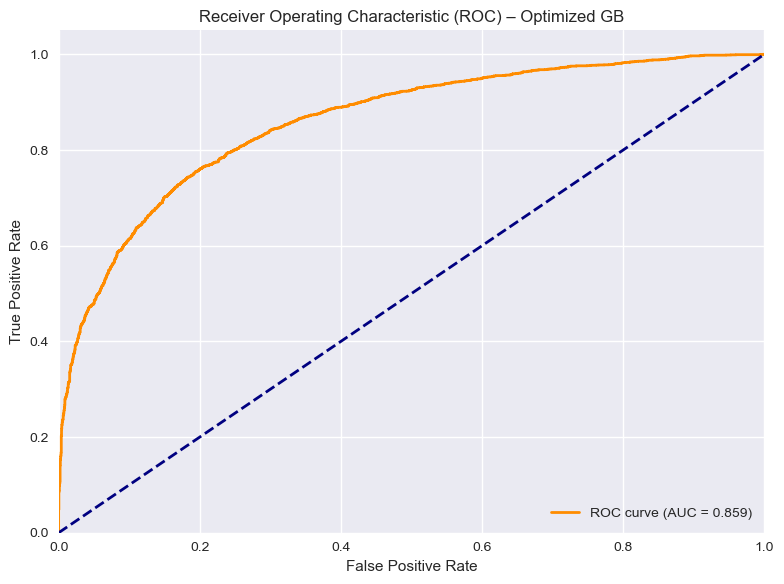

In [ ]:
# ROC Curve Plot
threshold = np.median(y_train)
y_true_bin = (y_test > threshold).astype(int)

fpr, tpr, roc_thresholds = roc_curve(y_true_bin, y_pred_opt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) – Optimized GB')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


# Feature importance

In [213]:
print("\n🔍 FEATURE IMPORTANCE ANALYSIS")
print("-" * 35)


🔍 FEATURE IMPORTANCE ANALYSIS
-----------------------------------


In [ ]:
# Get feature importances from the optimized gradient boosting model (or another tree-based model)
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

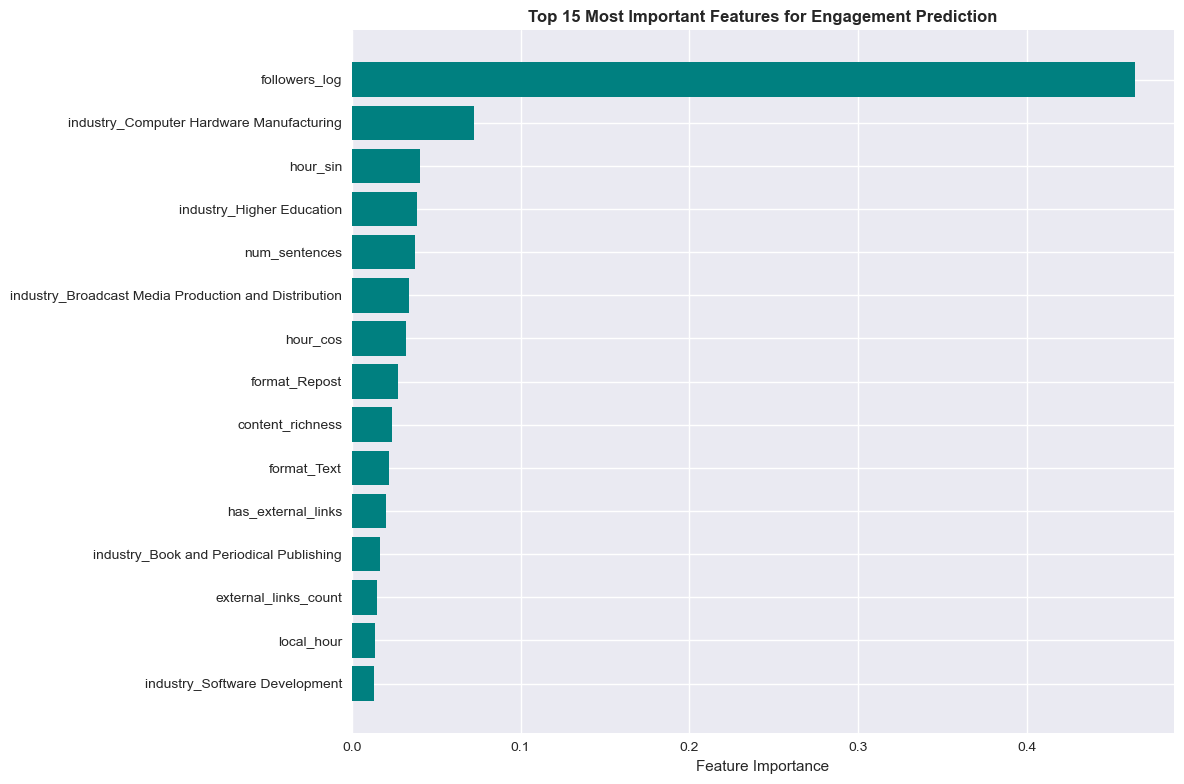

In [215]:
# Plot top N features
top_n = 15
plt.figure(figsize=(12, 8))
top_features = importance_df.head(top_n)
plt.barh(range(len(top_features)), top_features['importance'], color='teal')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Most Important Features for Engagement Prediction', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [216]:
# Print top 10 features in the console for quick view
print(f"\n🏆 TOP 10 MOST IMPORTANT FEATURES:")
for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:<40} {row['importance']:.4f}")


🏆 TOP 10 MOST IMPORTANT FEATURES:
 1. followers_log                            0.4639
 2. industry_Computer Hardware Manufacturing 0.0722
 3. hour_sin                                 0.0405
 4. industry_Higher Education                0.0385
 5. num_sentences                            0.0377
 6. industry_Broadcast Media Production and Distribution 0.0342
 7. hour_cos                                 0.0322
 8. format_Repost                            0.0276
 9. content_richness                         0.0237
10. format_Text                              0.0219


# Recommendations

In [218]:
print("\n💼 BUSINESS INSIGHTS AND RECOMMENDATIONS")
print("=" * 50)


💼 BUSINESS INSIGHTS AND RECOMMENDATIONS


In [261]:
# Use processed data for insights
data = df_processed
hour_col = 'local_hour'  # Change to 'local_hour_decimal' if you want more precision

In [262]:
# 1. Optimal posting times
print("\n🕐 OPTIMAL POSTING TIMES:")
optimal_times = data.groupby(['post_day', hour_col])['total_engagement'].mean().reset_index()
top_times = optimal_times.nlargest(10, 'total_engagement')

for _, row in top_times.iterrows():
    hour_str = f"{row[hour_col]:0.2f}" if hour_col == 'local_hour_decimal' else f"{int(row[hour_col]):02d}:00"
    print(f"   {row['post_day']} at {hour_str} - Avg engagement: {row['total_engagement']:.0f}")


🕐 OPTIMAL POSTING TIMES:
   Friday at 15:00 - Avg engagement: 392
   Monday at 20:00 - Avg engagement: 354
   Saturday at 01:00 - Avg engagement: 293
   Monday at 02:00 - Avg engagement: 280
   Wednesday at 23:00 - Avg engagement: 245
   Friday at 03:00 - Avg engagement: 227
   Tuesday at 02:00 - Avg engagement: 215
   Sunday at 21:00 - Avg engagement: 205
   Tuesday at 02:00 - Avg engagement: 196
   Tuesday at 03:00 - Avg engagement: 184


In [254]:
# 2. Format recommendations (sorted by performance)
print("\n📱 POST FORMAT RECOMMENDATIONS:")
format_performance = data.groupby('format')['total_engagement'].agg(['mean', 'count']).round(1)
format_performance = format_performance.sort_values('mean', ascending=False)

for format_type, row in format_performance.iterrows():
    print(f"   {format_type:<12} - Avg: {row['mean']:>6.1f} engagement ({int(row['count'])} posts)")


📱 POST FORMAT RECOMMENDATIONS:
   Repost       - Avg:  160.8 engagement (2833 posts)
   Video        - Avg:  137.4 engagement (4298 posts)
   Text         - Avg:  136.0 engagement (4169 posts)
   Image        - Avg:   93.0 engagement (12443 posts)
   Document     - Avg:   77.1 engagement (1291 posts)
   Article      - Avg:   42.6 engagement (4712 posts)
   Feed Sharing - Avg:   30.5 engagement (798 posts)
   Poll         - Avg:   27.5 engagement (164 posts)
   Unknown      - Avg:    0.0 engagement (1 posts)


In [223]:
# 3. Content strategy insights (improved with robust calculation)
print("\n📝 CONTENT STRATEGY INSIGHTS:")

# Hashtags impact
hashtag_impact = data.groupby('has_hashtags')['total_engagement'].mean()
if len(hashtag_impact) > 1 and hashtag_impact.get(0, 0) > 0:
    hashtag_boost = ((hashtag_impact.get(1, 0) / hashtag_impact.get(0, 1)) - 1) * 100
    print(f"   • Posts with hashtags perform {hashtag_boost:+.1f}% vs without hashtags")
else:
    print(f"   • Hashtag impact: insufficient data for comparison")

# External links impact
link_impact = data.groupby('has_external_links')['total_engagement'].mean()
if len(link_impact) > 1 and link_impact.get(0, 0) > 0:
    link_boost = ((link_impact.get(1, 0) / link_impact.get(0, 1)) - 1) * 100
    print(f"   • Posts with external links perform {link_boost:+.1f}% vs without links")
else:
    print(f"   • External links impact: insufficient data for comparison")

# Mentions impact
mention_impact = data.groupby('has_mentions')['total_engagement'].mean()
if len(mention_impact) > 1 and mention_impact.get(0, 0) > 0:
    mention_boost = ((mention_impact.get(1, 0) / mention_impact.get(0, 1)) - 1) * 100
    print(f"   • Posts with mentions perform {mention_boost:+.1f}% vs without mentions")
else:
    print(f"   • Mentions impact: insufficient data for comparison")


📝 CONTENT STRATEGY INSIGHTS:
   • Posts with hashtags perform -38.8% vs without hashtags
   • Posts with external links perform -22.1% vs without links
   • Posts with mentions perform -15.6% vs without mentions


In [225]:
# 4. Day segment insights
print("\n⏰ OPTIMAL DAY SEGMENTS:")
if 'day_segment' in data.columns:
    segment_performance = data.groupby('day_segment')['total_engagement'].mean().sort_values(ascending=False)
    for segment, avg_eng in segment_performance.items():
        print(f"   {segment.capitalize():<10} - Avg engagement: {avg_eng:.1f}")


⏰ OPTIMAL DAY SEGMENTS:
   Evening    - Avg engagement: 114.4
   Night      - Avg engagement: 107.0
   Afternoon  - Avg engagement: 104.6
   Morning    - Avg engagement: 87.5


In [226]:
# 5. Audience-specific recommendations
print("\n👥 AUDIENCE-SPECIFIC RECOMMENDATIONS:")
segment_cats = getattr(data['audience_size_category'], 'categories', pd.unique(data['audience_size_category']))
for category in segment_cats:
    subset = data[data['audience_size_category'] == category]
    if len(subset) == 0:
        continue
    
    best_format = subset.groupby('format')['total_engagement'].mean().idxmax()
    best_day = subset.groupby('post_day')['total_engagement'].mean().idxmax()
    best_hour = subset.groupby(hour_col)['total_engagement'].mean().idxmax()
    
    # Include day segment if available
    if 'day_segment' in subset.columns:
        best_segment = subset.groupby('day_segment')['total_engagement'].mean().idxmax()
    else:
        best_segment = "N/A"
    
    hour_str = f"{best_hour:0.2f}" if hour_col == 'local_hour_decimal' else f"{int(best_hour):02d}:00"
    
    print(f"\n   {category} Audience:")
    print(f"     - Best format: {best_format}")
    print(f"     - Best day: {best_day}")
    print(f"     - Best hour: {hour_str}")
    if best_segment != "N/A":
        print(f"     - Best day segment: {best_segment}")


👥 AUDIENCE-SPECIFIC RECOMMENDATIONS:

   Medium Audience:
     - Best format: Repost
     - Best day: Sunday
     - Best hour: 16:00
     - Best day segment: afternoon

   Large Audience:
     - Best format: Repost
     - Best day: Wednesday
     - Best hour: 02:00
     - Best day segment: morning

   Small Audience:
     - Best format: Repost
     - Best day: Saturday
     - Best hour: 03:00
     - Best day segment: night

   Enterprise Audience:
     - Best format: Text
     - Best day: Wednesday
     - Best hour: 20:00
     - Best day segment: evening


In [227]:
# 6. Key success factors (from feature importance analysis)
print("\n🎯 KEY SUCCESS FACTORS (from ML model):")
top_5_features = importance_df.head(5)  # Use the importance_df from feature analysis
for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
    print(f"   {i}. {row['feature']} (importance: {row['importance']:.3f})")


🎯 KEY SUCCESS FACTORS (from ML model):
   1. followers_log (importance: 0.464)
   2. industry_Computer Hardware Manufacturing (importance: 0.072)
   3. hour_sin (importance: 0.040)
   4. industry_Higher Education (importance: 0.038)
   5. num_sentences (importance: 0.038)


In [230]:
# 7. Industry-specific insights (new addition based on feature importance!)
print("\n🏭 INDUSTRY-SPECIFIC INSIGHTS:")
industry_performance = data.groupby('industry')['total_engagement'].mean().sort_values(ascending=False).head(5)
print("   Top performing industries by average engagement:")
for industry, avg_eng in industry_performance.items():
    print(f"     • {industry}: {avg_eng:.1f} avg engagement")


🏭 INDUSTRY-SPECIFIC INSIGHTS:
   Top performing industries by average engagement:
     • Computer Hardware Manufacturing: 664.7 avg engagement
     • Spectator Sports: 579.6 avg engagement
     • Higher Education: 415.0 avg engagement
     • Law Enforcement: 211.1 avg engagement
     • Technology, Information and Internet: 171.4 avg engagement


In [231]:
print("\n" + "="*50)
print("📈 Business insights generation complete!")


📈 Business insights generation complete!


# Model Performance plots

In [233]:
print("\n📊 MODEL PERFORMANCE VISUALIZATION")
print("-" * 40)


📊 MODEL PERFORMANCE VISUALIZATION
----------------------------------------


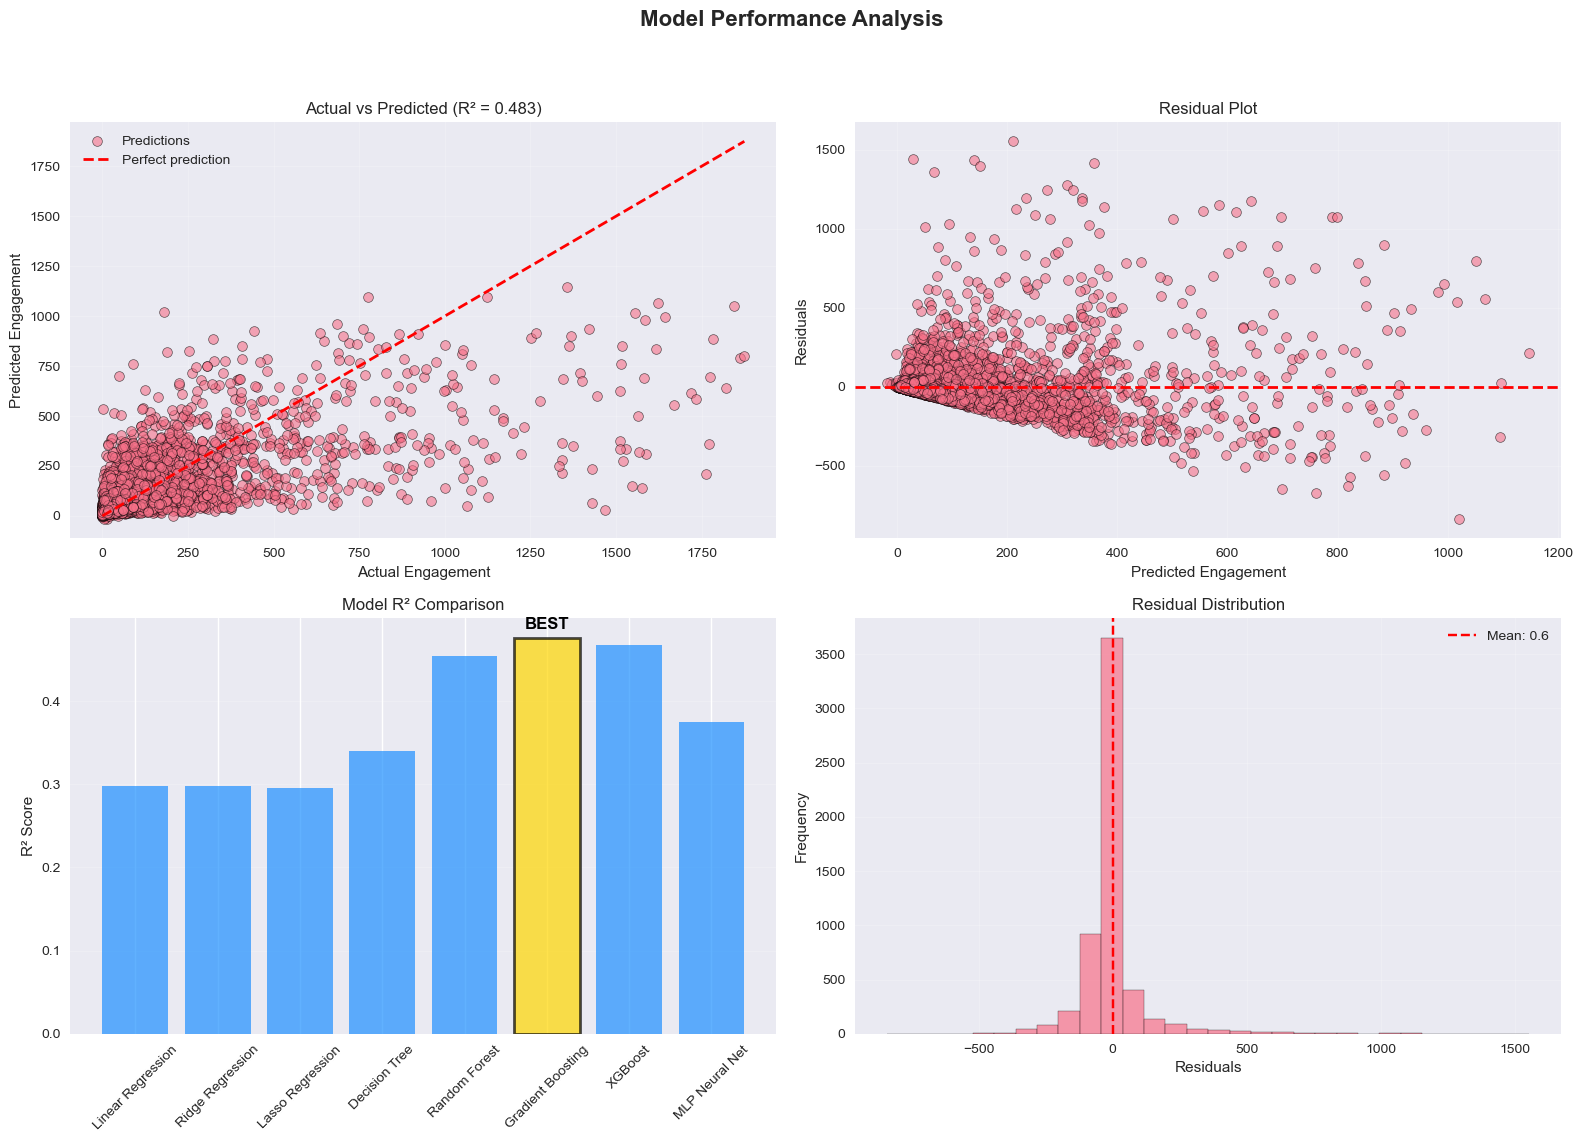

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Analysis', fontsize=16, fontweight='bold')

# 1. Actual vs Predicted
axes[0, 0].scatter(
    y_test, y_pred_opt, alpha=0.6, edgecolors='k', linewidth=0.5,
    label='Predictions'
)
axes[0, 0].plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    'r--', lw=2, label='Perfect prediction'
)
axes[0, 0].set_xlabel('Actual Engagement')
axes[0, 0].set_ylabel('Predicted Engagement')
axes[0, 0].set_title(f'Actual vs Predicted (R² = {r2_score(y_test, y_pred_opt):.3f})')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.2)

# 2. Residuals plot
residuals = np.array(y_test) - np.array(y_pred_opt)
axes[0, 1].scatter(
    y_pred_opt, residuals, alpha=0.6, edgecolors='k', linewidth=0.5
)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Engagement')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.2)

# 3. Model comparison
model_names = list(performance_df.index)
test_r2_scores = performance_df['Test R²'].values
bars = axes[1, 0].bar(model_names, test_r2_scores, alpha=0.7, color='dodgerblue')
axes[1, 0].set_title('Model R² Comparison')
axes[1, 0].set_ylabel('R² Score')
axes[1, 0].tick_params(axis='x', rotation=45)
best_idx = np.argmax(test_r2_scores)
bars[best_idx].set_color('gold')
bars[best_idx].set_edgecolor('black')
bars[best_idx].set_linewidth(2)
axes[1, 0].text(
    best_idx,
    test_r2_scores[best_idx] + 0.01,
    'BEST', color='black', ha='center', fontweight='bold'
)
axes[1, 0].grid(True, axis='y', alpha=0.2)

# 4. Error/residual distribution
axes[1, 1].hist(
    residuals, bins=30, alpha=0.7, edgecolor='black'
)
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Residual Distribution')
axes[1, 1].axvline(residuals.mean(), color='red', linestyle='--', label=f'Mean: {residuals.mean():.1f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()